In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
workbook = pd.read_csv('COVID-19-DATABASE.xlsx-CONFIRMED.csv')
workbook.head()

,MM (Morbidity Month),MW (Morbidity Week),DATE REPORTED,DRU,REGION OF DRU,MUNCITY OF DRU,LAST NAME,FIRST NAME,MIDDLE NAME,DOB,...,ADDRESS(LSI),OFW(Y/N),PLACE OF ORIGIN (OFW),DATE OF ARRIVAL (OFW),AUTHORIZED PERSON OUTSIDE RESIDENCE (Y/N),LOCAL/IMPORTED CASE,RETURNING OVERSEAS FILIPIN (Y/N),REMARKS,DUPLICATE CHECKER,DATE (SORTED)
0,9/21/2021,39.0,08-29-2019,JTCENICA MEDICAL SYSTEM,4A,GENERAL TRIAS,Patient 13083,Patient 13083,unknown,09/15/1959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 13083, Patient 13083 unknown",08-29-2019
1,NaN,NaN,01-08-2020,NaN,4A,GENERAL TRIAS,Patient 188,Patient 188,unknown,09/12/1986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 188, Patient 188 unknown",01-08-2020
2,NaN,NaN,01-08-2020,NaN,4A,GENERAL TRIAS,Patient 220,Patient 220,Unknown,02/07/1989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 220, Patient 220 Unknown",01-08-2020
3,NaN,NaN,01-09-2020,NaN,4A,GENERAL TRIAS,Patient 1097,Patient 1097,unknown,07/02/1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 1097, Patient 1097 unknown",01-09-2020
4,NaN,NaN,01-09-2020,NaN,4A,GENERAL TRIAS,Patient 1099,Patient 1099,Unknown,03/22/1991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 1099, Patient 1099 Unknown",01-09-2020


In [40]:
boink = workbook['DATE REPORTED']
boink.head()

0    08-29-2019
1    01-08-2020
2    01-08-2020
3    01-09-2020
4    01-09-2020
Name: DATE REPORTED, dtype: object

In [41]:
freq = {}
for item in boink:
    if len(str(item)) == 10: #filter to check for anomalies in format
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1

In [42]:
xpoints = []
ypoints = []
for key, value in freq.items():
        print (key, ":", value)
        xpoints.append(key)
        ypoints.append(int(value))

08-29-2019 : 1
01-08-2020 : 2
01-09-2020 : 6
01-10-2020 : 1
01-11-2020 : 9
01-12-2020 : 1
02-08-2020 : 1
02-09-2020 : 6
02-10-2020 : 18
02-11-2020 : 1
02-12-2020 : 1
03-01-2020 : 1
03-07-2020 : 2
03-08-2020 : 1
03-09-2020 : 9
03-10-2020 : 2
03-12-2020 : 3
03-20-2020 : 1
03-25-2020 : 1
03-26-2020 : 1
03-28-2020 : 2
03-29-2020 : 1
04-01-2020 : 1
04-02-2020 : 1
04-05-2020 : 3
04-08-2020 : 1
04-09-2020 : 14
04-10-2020 : 7
04-12-2020 : 1
04-13-2020 : 1
04-14-2020 : 1
04-16-2020 : 2
04-21-2020 : 1
04-25-2020 : 2
04-30-2020 : 1
05-08-2020 : 5
05-09-2020 : 34
05-10-2020 : 5
05-11-2020 : 3
05-12-2020 : 4
05-14-2020 : 1
05-16-2020 : 2
05-18-2020 : 2
05-19-2020 : 1
05-23-2020 : 2
05-25-2020 : 1
05-29-2020 : 1
05-31-2020 : 1
06-03-2020 : 2
06-04-2020 : 2
06-08-2020 : 8
06-09-2020 : 10
06-10-2020 : 1
06-12-2020 : 2
06-13-2020 : 2
06-18-2020 : 1
06-19-2020 : 1
06-20-2020 : 5
06-22-2020 : 8
06-23-2020 : 2
06-24-2020 : 6
06-25-2020 : 3
06-26-2020 : 1
06-27-2020 : 3
06-28-2020 : 1
06-29-2020 : 3
06-30-

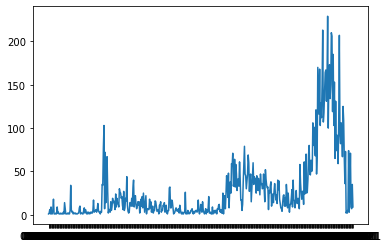

In [43]:
# Matplotlib Implementation
plt.plot(xpoints, ypoints)
plt.show()

In [62]:
# Pandas
data = np.stack((xpoints, ypoints), axis=1)
data = pd.DataFrame(data, columns=["Date", "Frequency"])
data

,Date,Frequency
0,08-29-2019,1
1,01-08-2020,2
2,01-09-2020,6
3,01-10-2020,1
4,01-11-2020,9
...,...,...
490,11-04-2021,71
491,12-01-2021,9
492,12-02-2021,7
493,12-03-2021,35


In [64]:
data.plot(kind="bar", x="Date", y="Frequency")

TypeError: no numeric data to plot